# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initial setup

test = test=df

train = train_df

merchants = merchants_df

new_merchant_transactions = new_trans_df

historical_transactions = hist_trans_df

Data_Dictionary = history_info

In [2]:
history_info = pd.read_excel("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\Data Dictionary.xlsx")
#Data_Dictionary2 = pd.read_excel("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\Data_Dictionary.xlsx")
#historical_transactions = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\historical_transactions.csv")
merchants_df= pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\merchants.csv")
new_trans_df = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\new_merchant_transactions.csv")
sample_submission = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\sample_submission.csv")
test_df = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\test.csv")
train_df = pd.read_csv("C:\\Users\\Nancy\\OneDrive\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\train.csv")

In [3]:
import pandas as pd

# Define a variable for processing data in chunks
chunk_size = 100000  # Adjust this based on memory capacity
historical_transactions = pd.read_csv(
    "C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4000\\elo-merchant-category-recommendation\\historical_transactions.csv",
    chunksize=chunk_size,
    encoding='ISO-8859-1'
)

#Concatenate chunks or process each chunk individually
hist_trans_df  = pd.concat([chunk for chunk in historical_transactions])

In [4]:
# Using the below function for memory optimization so that space can be utilized in better way
# Taken from https://www.kaggle.com/rinnqd/reduce-memory-usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [5]:

# Applying the above function to each dataframe
history_info = reduce_mem_usage(history_info)
hist_trans_df = reduce_mem_usage(hist_trans_df)
merchants_df = reduce_mem_usage(merchants_df)
new_trans_df = reduce_mem_usage(new_trans_df)
sample_submission = reduce_mem_usage(sample_submission)
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

#test = test_df
#sample_submission
#train = train_df
#merchants = merchants_df
#new_merchant_transactions = new_trans_df
#historical_transactions = hist_trans_df
#Data_Dictionary = history_info

Memory usage after optimization is: 0.00 MB
Decreased by 0.0%
Memory usage after optimization is: 1749.11 MB
Decreased by 43.7%
Memory usage after optimization is: 30.32 MB
Decreased by 46.0%
Memory usage after optimization is: 114.20 MB
Decreased by 45.5%
Memory usage after optimization is: 1.06 MB
Decreased by 43.7%
Memory usage after optimization is: 4.04 MB
Decreased by 56.2%
Memory usage after optimization is: 2.24 MB
Decreased by 52.5%


In [6]:
train_df.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [7]:
test_df.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [8]:
test_df['first_active_month'].fillna(test_df['first_active_month'].mode()[0], inplace=True)

In [9]:
new_trans_df.shape, hist_trans_df.shape, merchants_df.shape, train_df.shape,test_df.shape

((1963031, 14), (29112361, 14), (334696, 22), (201917, 6), (123623, 5))

# Exploratory data Analysis(Eda)

# 1.  historical transactions

In [10]:
hist_trans_df.head(2)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16


In [11]:
hist_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int16  
 3   category_1            object 
 4   installments          int16  
 5   category_3            object 
 6   merchant_category_id  int16  
 7   merchant_id           object 
 8   month_lag             int8   
 9   purchase_amount       float32
 10  purchase_date         object 
 11  category_2            float16
 12  state_id              int8   
 13  subsector_id          int8   
dtypes: float16(1), float32(1), int16(3), int8(3), object(6)
memory usage: 1.7+ GB


In [12]:
hist_trans_df.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [13]:
def clean_and_convert_columns(df):
    """
    A function to h objandleect columns 
    """
    # Convert specific columns to string
    str_columns = ['authorized_flag', 'card_id', 'category_1', 'category_3', 'merchant_id']
    for col in str_columns:
        if col in df.columns:
            df[col] = df[col].astype('string')
    # Convert 'purchase_date' to datetime format with time
    if 'purchase_date' in df.columns:
        df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')
    
    return df

In [14]:
hist_trans_df = clean_and_convert_columns(hist_trans_df)
print(hist_trans_df.dtypes)

authorized_flag                 string
card_id                         string
city_id                          int16
category_1                      string
installments                     int16
category_3                      string
merchant_category_id             int16
merchant_id                     string
month_lag                         int8
purchase_amount                float32
purchase_date           datetime64[ns]
category_2                     float16
state_id                          int8
subsector_id                      int8
dtype: object


In [15]:
# Find the mode of 'category_3' using the maximum count
category_3_mode = hist_trans_df['category_3'].value_counts().idxmax()
category_3_count = hist_trans_df['category_3'].value_counts().max()
print(f"Mode of 'category_3': {category_3_mode} (Count: {category_3_count})")

# Find the mode of 'merchant_id' using the maximum count
merchant_id_mode = hist_trans_df['merchant_id'].value_counts().idxmax()
merchant_id_count = hist_trans_df['merchant_id'].value_counts().max()
print(f"Mode of 'merchant_id': {merchant_id_mode} (Count: {merchant_id_count})")

# Find the mode of 'category_2' using the maximum count
category_2_mode = hist_trans_df['category_2'].value_counts().idxmax()
category_2_count = hist_trans_df['category_2'].value_counts().max()
print(f"Mode of 'category_2': {category_2_mode} (Count: {category_2_count})")

Mode of 'category_3': A (Count: 15411747)
Mode of 'merchant_id': M_ID_00a6ca8a8a (Count: 1115097)
Mode of 'category_2': 1.0 (Count: 15177199)


In [16]:
hist_trans_df['category_3'].fillna('A',inplace=True)
hist_trans_df['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
hist_trans_df['category_2'].fillna('1.0',inplace=True)

In [17]:
#convert to binary
hist_trans_df['authorized_flag'] = hist_trans_df['authorized_flag'].map({'Y': 1, 'N': 0, 'nan': None})
hist_trans_df['category_1'] = hist_trans_df['category_1'].map({'Y': 1, 'N': 0, 'nan': None})
hist_trans_df['category_3'] = hist_trans_df['category_3'].map({'A': 0, 'B': 1, 'C': 2})

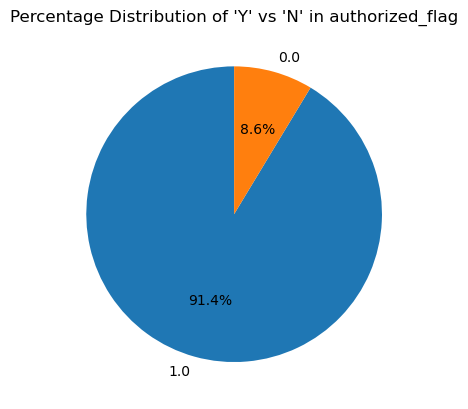

In [18]:
percentage_distribution = hist_trans_df['authorized_flag'].value_counts(normalize=True) * 100
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in authorized_flag")
plt.ylabel('')  
plt.show()


In [19]:
autorized_card_rate = hist_trans_df.groupby(['card_id'])['authorized_flag'].mean().sort_values()
autorized_card_rate

card_id
C_ID_744d26ea32    0.030488
C_ID_bb8dd137c9    0.037037
C_ID_e56202cd39    0.042105
C_ID_4feacff118    0.050000
C_ID_c27b4f80f7    0.054545
                     ...   
C_ID_d048b7cc60    1.000000
C_ID_4e45fcdb43    1.000000
C_ID_9f3ee1305e    1.000000
C_ID_1b52a3e21b    1.000000
C_ID_d3c3d988d5    1.000000
Name: authorized_flag, Length: 325540, dtype: float64

most of the cards seem to be authorised (91.35%)

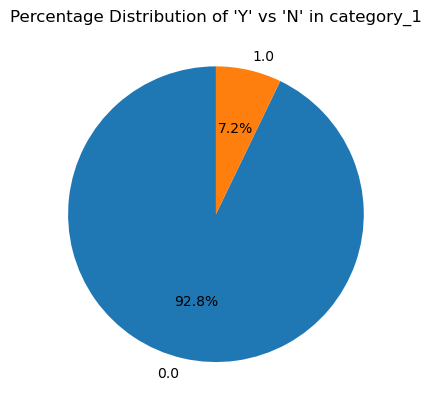

In [20]:
percentage_distribution = hist_trans_df['category_1'].value_counts(normalize=True) * 100

# Plotting the percentage distribution in a pie chart
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in category_1")
plt.ylabel('')  
plt.show()


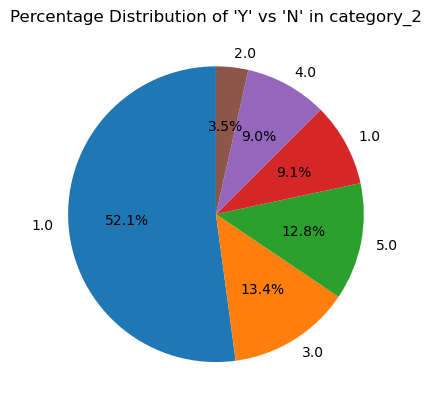

In [21]:
percentage_distribution = hist_trans_df['category_2'].value_counts(normalize=True) * 100
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in category_2")
plt.ylabel('')  
plt.show()

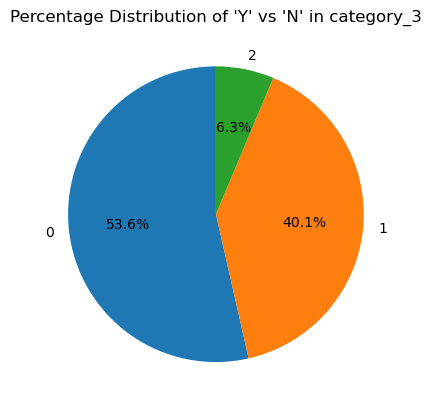

In [22]:
percentage_distribution = hist_trans_df['category_3'].value_counts(normalize=True) * 100
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in category_3")
plt.ylabel('')  
plt.show()


In [23]:
hist_trans_df['installments'].value_counts().sort_index()

-1        178159
 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
 5        116090
 6        132634
 7         10906
 8         20474
 9          5772
 10       118827
 11          830
 12        55064
 999         188
Name: installments, dtype: int64

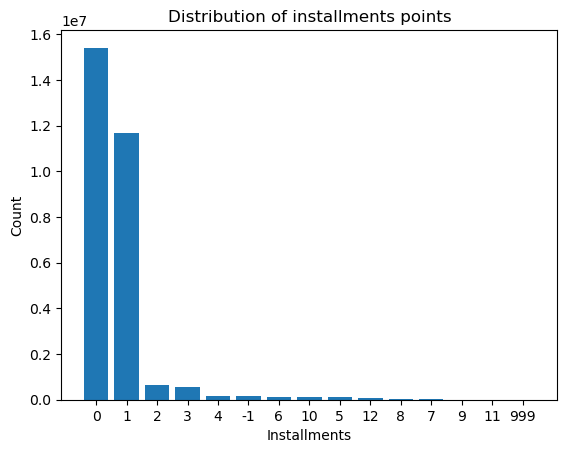

In [24]:
plt.bar(hist_trans_df['installments'].value_counts().index.astype('str'), 
        hist_trans_df['installments'].value_counts().values)
plt.xlabel('Installments')
plt.ylabel('Count')
plt.title('Distribution of installments points')
plt.show()


As it can be seen in the above graph that most of the values are 0 and 1 and other values are very less in number.

installment 999 has extremely low authorisation rate (3%), could this mean they are fraud?

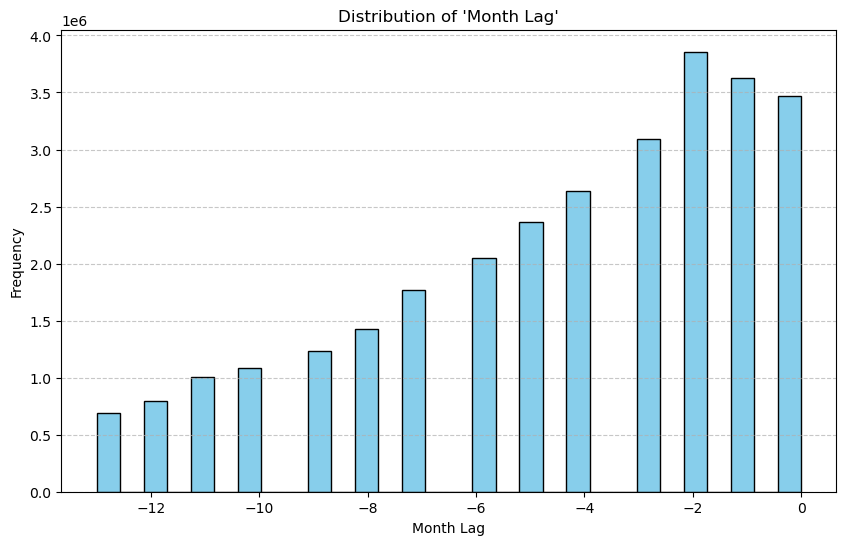

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(hist_trans_df['month_lag'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 'Month Lag'")
plt.xlabel("Month Lag")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I gueess month lag means transaction that happened X months before the transaction date and a specific reference pt, which I think is the date elo started recommendation?

In [26]:
hist_trans_df[['purchase_date', 'month_lag']].head()

,purchase_date,month_lag
0,2017-06-25 15:33:07,-8
1,2017-07-15 12:10:45,-7
2,2017-08-09 22:04:29,-6
3,2017-09-02 10:06:26,-5
4,2017-03-10 01:14:19,-11


Seems like elo started recommendation in 2018-02

In [27]:
print('There are {} unique merchants ids'.format(len(hist_trans_df['merchant_id'].unique())))

There are 326311 unique merchants ids


In [28]:
# Lets see their authencity based on previous record
hist_trans_df.groupby(['merchant_id'])['authorized_flag'].agg(['mean']).sort_values(by='mean')

,mean
merchant_id,
M_ID_d85500250a,0.0
M_ID_f0aea19030,0.0
M_ID_bef642c550,0.0
M_ID_caa8094176,0.0
M_ID_01dc7ed241,0.0
...,...
M_ID_217096c999,1.0
M_ID_8f4d2a8ec4,1.0
M_ID_8f4d3b1284,1.0


lowest ones are with zero percentage and highest ones are with higher percentages

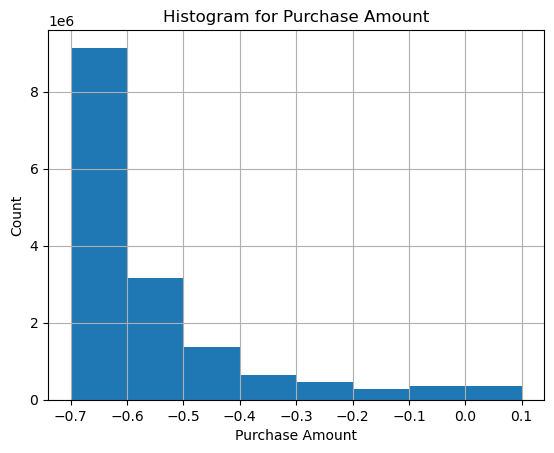

In [29]:

hist_trans_df['purchase_amount'].hist(bins=[-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.1])  # Adjust range based on data distribution
plt.title('Histogram for Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.show()


The above histogram shows the distribution of purchase amount .It can be seen that most of the values are negative in the histogram and very less positive values.

In [30]:
# Lets see how many points are negative.
print('There are {} values which are negative'.format(np.sum(hist_trans_df['purchase_amount']<0)))

There are 28036884 values which are negative


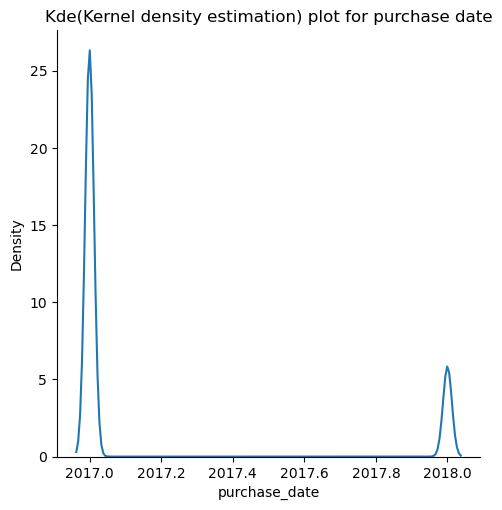

In [31]:
# Now lets see purchase date feature
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(pd.to_datetime(hist_trans_df['purchase_date']).dt.year,kind='kde')
plt.title('Kde(Kernel density estimation) plot for purchase date')
plt.show()

The above kdeplot(kernel density estimation) shows that most points lies in 2017 from first month to second month. And then second most points lies in 2018 year.

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

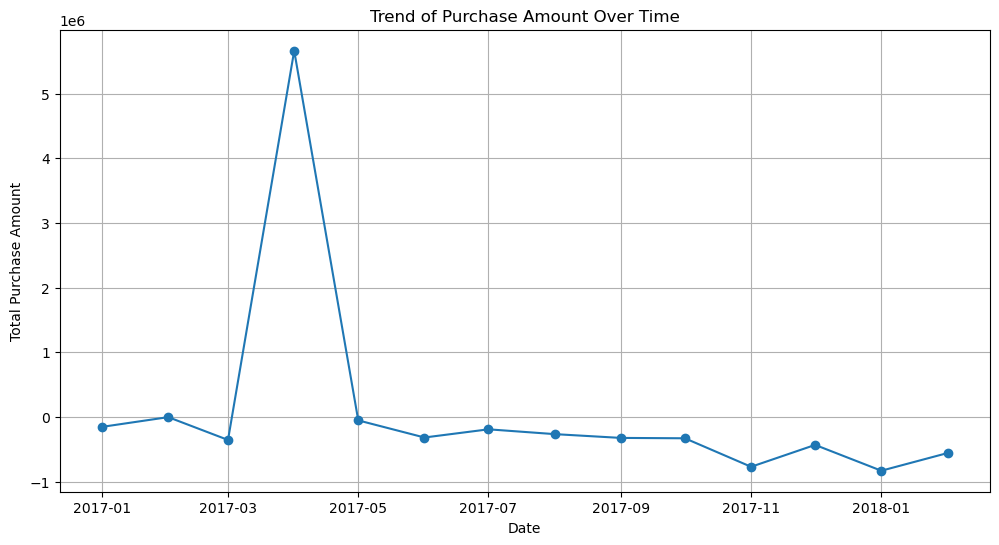

In [32]:
import pandas as pd
import gc
import matplotlib.pyplot as plt

# Step 1: Convert types and optimize memory usage
hist_trans_df['purchase_amount'] = hist_trans_df['purchase_amount'].astype('float32')
hist_trans_df['purchase_date'] = pd.to_datetime(hist_trans_df['purchase_date'], errors='coerce')

# Step 2: Remove unused variables and free memory
gc.collect()

# Step 3: Group data by month and convert index to datetime
hist_trans_df['year_month'] = hist_trans_df['purchase_date'].dt.to_period('M')
monthly_purchase_amount = hist_trans_df.groupby('year_month')['purchase_amount'].sum()
monthly_purchase_amount.index = monthly_purchase_amount.index.to_timestamp()  # Convert PeriodIndex to Timestamp

# Step 4: Plot the trend for purchase amount
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchase_amount, marker='o', linestyle='-')
plt.title('Trend of Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.xticks



In [33]:
# Count and calculate mean for purchase_amount < 0
count_less_than_0 = (hist_trans_df['purchase_amount'] < 0).sum()
mean_authorized_flag_less_than_0 = hist_trans_df.loc[hist_trans_df['purchase_amount'] < 0, 'authorized_flag'].mean()

print(f"Number of transactions with purchase_amount < 0: {count_less_than_0}")
print(f"Mean authorized_flag for purchase_amount < 0: {mean_authorized_flag_less_than_0}")

# Count and calculate mean for purchase_amount == 0
count_equal_to_0 = (hist_trans_df['purchase_amount'] == 0).sum()
mean_authorized_flag_equal_to_0 = hist_trans_df.loc[hist_trans_df['purchase_amount'] == 0, 'authorized_flag'].mean()

print(f"Number of transactions with purchase_amount = 0: {count_equal_to_0}")
print(f"Mean authorized_flag for purchase_amount = 0: {mean_authorized_flag_equal_to_0}")

# Count and calculate mean for purchase_amount > 0
count_greater_than_0 = (hist_trans_df['purchase_amount'] > 0).sum()
mean_authorized_flag_greater_than_0 = hist_trans_df.loc[hist_trans_df['purchase_amount'] > 0, 'authorized_flag'].mean()

print(f"Number of transactions with purchase_amount > 0: {count_greater_than_0}")
print(f"Mean authorized_flag for purchase_amount > 0: {mean_authorized_flag_greater_than_0}")



Number of transactions with purchase_amount < 0: 28036884
Mean authorized_flag for purchase_amount < 0: 0.91808387123191
Number of transactions with purchase_amount = 0: 10
Mean authorized_flag for purchase_amount = 0: 1.0
Number of transactions with purchase_amount > 0: 1075467
Mean authorized_flag for purchase_amount > 0: 0.7952182633218872


Most transactions have purchase amt <0 but they are mostly authorised. Could this mean they are refunded??? And if purhcase amt is 0, whats its purpose????

In [34]:
for col in ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']:
    print(f"There are {hist_trans_df[col].nunique()} unique values in the column {col}.")

There are 308 unique values in the column city_id.
There are 327 unique values in the column merchant_category_id.
There are 326311 unique values in the column merchant_id.
There are 25 unique values in the column state_id.
There are 41 unique values in the column subsector_id.


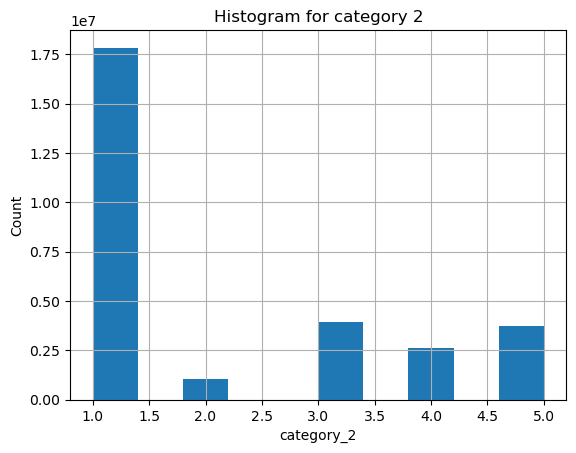

In [35]:
# Convert category_2 to numeric, setting errors='coerce' will turn non-numeric values into NaN
category_2_numeric = pd.to_numeric(hist_trans_df['category_2'], errors='coerce')

# Drop NaN values
category_2_numeric = category_2_numeric.dropna()

# Now plot the histogram
category_2_numeric.hist()
plt.xlabel('category_2')
plt.ylabel('Count')
plt.title('Histogram for category 2')
plt.show()


In [36]:
# Check for NaN values in the category_2 column
print('There are {} NaN values in the category_2 column'.format(hist_trans_df['category_2'].isna().sum()))

# Check for unique values in state_id and subsector_id columns
print('There are {} unique state ids'.format(len(hist_trans_df['state_id'].unique())))
print('There are {} unique subsector ids'.format(len(hist_trans_df['subsector_id'].unique())))


There are 0 NaN values in the category_2 column
There are 25 unique state ids
There are 41 unique subsector ids


## 2. new merchants transactions

In [37]:
new_trans_df = clean_and_convert_columns(new_trans_df)
print(new_trans_df.dtypes)

authorized_flag                 string
card_id                         string
city_id                          int16
category_1                      string
installments                     int16
category_3                      string
merchant_category_id             int16
merchant_id                     string
month_lag                         int8
purchase_amount                float16
purchase_date           datetime64[ns]
category_2                     float16
state_id                          int8
subsector_id                      int8
dtype: object


In [38]:
new_trans_df.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [39]:
# Find the mode of 'category_3' using the maximum count
category_3_mode = new_trans_df['category_3'].value_counts().idxmax()
category_3_count = new_trans_df['category_3'].value_counts().max()
print(f"Mode of 'category_3': {category_3_mode} (Count: {category_3_count})")

# Find the mode of 'merchant_id' using the maximum count
merchant_id_mode = new_trans_df['merchant_id'].value_counts().idxmax()
merchant_id_count = new_trans_df['merchant_id'].value_counts().max()
print(f"Mode of 'merchant_id': {merchant_id_mode} (Count: {merchant_id_count})")

# Find the mode of 'category_2' using the maximum count
category_2_mode = new_trans_df['category_2'].value_counts().idxmax()
category_2_count = new_trans_df['category_2'].value_counts().max()
print(f"Mode of 'category_2': {category_2_mode} (Count: {category_2_count})")

Mode of 'category_3': A (Count: 922244)
Mode of 'merchant_id': M_ID_00a6ca8a8a (Count: 23018)
Mode of 'category_2': 1.0 (Count: 1058242)


In [40]:
new_trans_df['category_3'].fillna('A',inplace=True)
new_trans_df['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
new_trans_df['category_2'].fillna('1.0',inplace=True)

In [41]:
#convert to binary
new_trans_df['authorized_flag'] = new_trans_df['authorized_flag'].map({'Y': 1, 'N': 0, 'nan': None})
new_trans_df['category_1'] = new_trans_df['category_1'].map({'Y': 1, 'N': 0, 'nan': None})
new_trans_df['category_3'] = new_trans_df['category_3'].map({'A': 0, 'B': 1, 'C': 2})

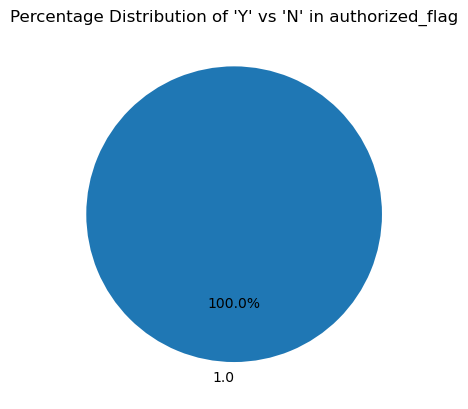

In [42]:
#convert to binary
percentage_distribution = new_trans_df['authorized_flag'].value_counts(normalize=True) * 100
# Plotting the percentage distribution in a pie chart
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in authorized_flag")
plt.ylabel('')  
plt.show()

Wow all transactions are authorised!

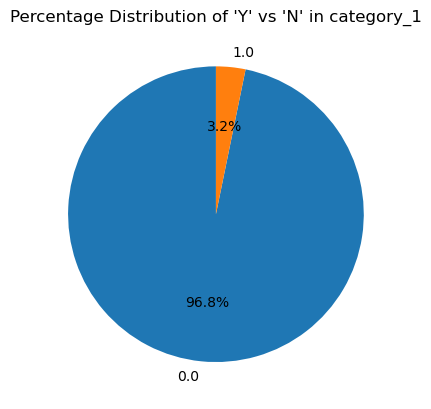

In [43]:
percentage_distribution = new_trans_df['category_1'].value_counts(normalize=True) * 100
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in category_1")
plt.ylabel('')  
plt.show()

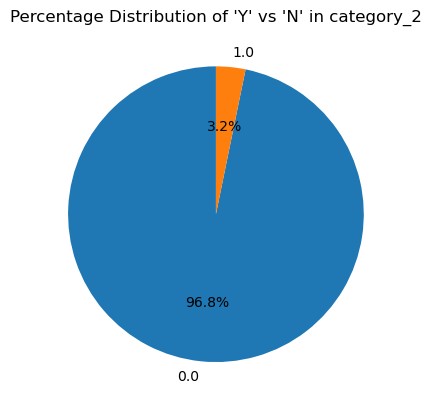

In [44]:
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in category_2")
plt.ylabel('')  
plt.show()

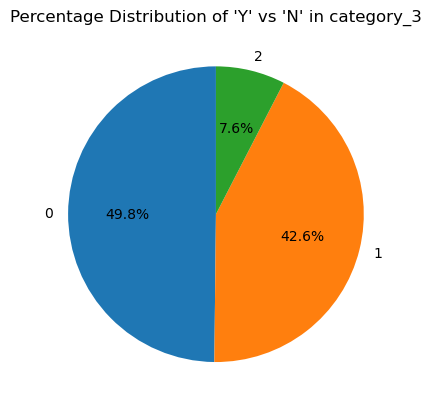

In [45]:
percentage_distribution = new_trans_df['category_3'].value_counts(normalize=True) * 100
percentage_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of 'Y' vs 'N' in category_3")
plt.ylabel('')  
plt.show()

In [46]:
new_trans_df['installments'].value_counts().sort_index()

-1       55922
 0      922244
 1      836178
 2       54729
 3       44750
 4       14815
 5        9296
 6       10389
 7         863
 8        1555
 9         478
 10       8899
 11         61
 12       2850
 999         2
Name: installments, dtype: int64

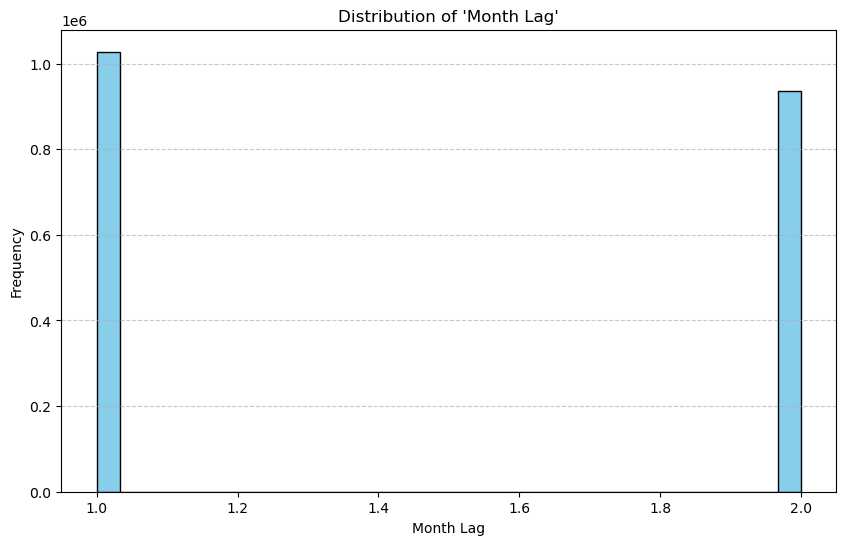

,purchase_date,month_lag
0,2018-03-11 14:57:36,1
1,2018-03-19 18:53:37,1
2,2018-04-26 14:08:44,2
3,2018-03-07 09:43:21,1
4,2018-03-22 21:07:53,1


In [47]:
plt.figure(figsize=(10, 6))
plt.hist(new_trans_df['month_lag'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 'Month Lag'")
plt.xlabel("Month Lag")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

new_trans_df[['purchase_date', 'month_lag']].head()

In [48]:
# Count transactions and calculate mean authorized_flag for purchase_amount < 0
count_less_than_0 = (new_trans_df['purchase_amount'] < 0).sum()
mean_authorized_flag_less_than_0 = new_trans_df[new_trans_df['purchase_amount'] < 0]['authorized_flag'].mean()
print(f"Number of transactions with purchase_amount < 0: {count_less_than_0}")
print(f"Mean authorized_flag for purchase_amount < 0: {mean_authorized_flag_less_than_0}")

# Count transactions and calculate mean authorized_flag for purchase_amount == 0
count_equal_to_0 = (new_trans_df['purchase_amount'] == 0).sum()
mean_authorized_flag_equal_to_0 = new_trans_df[new_trans_df['purchase_amount'] == 0]['authorized_flag'].mean()
print(f"Number of transactions with purchase_amount = 0: {count_equal_to_0}")
print(f"Mean authorized_flag for purchase_amount = 0: {mean_authorized_flag_equal_to_0}")

# Count transactions and calculate mean authorized_flag for purchase_amount > 0
count_greater_than_0 = (new_trans_df['purchase_amount'] > 0).sum()
mean_authorized_flag_greater_than_0 = new_trans_df[new_trans_df['purchase_amount'] > 0]['authorized_flag'].mean()
print(f"Number of transactions with purchase_amount > 0: {count_greater_than_0}")
print(f"Mean authorized_flag for purchase_amount > 0: {mean_authorized_flag_greater_than_0}")

Number of transactions with purchase_amount < 0: 1877357
Mean authorized_flag for purchase_amount < 0: 1.0
Number of transactions with purchase_amount = 0: 0
Mean authorized_flag for purchase_amount = 0: nan
Number of transactions with purchase_amount > 0: 85674
Mean authorized_flag for purchase_amount > 0: 1.0


In [49]:
for col in ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']:
    print(f"There are {new_trans_df[col].nunique()} unique values in the column {col}.")

There are 308 unique values in the column city_id.
There are 314 unique values in the column merchant_category_id.
There are 226129 unique values in the column merchant_id.
There are 25 unique values in the column state_id.
There are 41 unique values in the column subsector_id.


now month lags are positive. This means historical data are transactions before or during the month where elo started recommendation, and new transactions are after that month.

the table new merchants data is exactly similar to the historical data even the data provided in the historical data is more compared to new merchants data that why there is no need for the analysis of new merchants data

# 3. Merchant Data

In [50]:

merchants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int32  
 2   merchant_category_id         334696 non-null  int16  
 3   subsector_id                 334696 non-null  int8   
 4   numerical_1                  334696 non-null  float16
 5   numerical_2                  334696 non-null  float16
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float32
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int8   
 12  avg_sales_lag6               334683 non-null  float32
 13 

In [51]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,...,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,...,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,...,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [52]:

print('There are {} unique merchants groups'.format(len(merchants_df['merchant_group_id'].unique())))
print('There are {} unique merchants categories'.format(len(merchants_df['merchant_category_id'].unique())))
print('There are {} unique merchants subsectors'.format(len(merchants_df['subsector_id'].unique())))
print('There are {} unique cities'.format(len(merchants_df['city_id'].unique())))

There are 109391 unique merchants groups
There are 324 unique merchants categories
There are 41 unique merchants subsectors
There are 271 unique cities


In [53]:
merchants_df['merchant_id'] = merchants_df['merchant_id'].astype('string')
merchants_df['category_1'] = merchants_df['category_1'].astype('category')
merchants_df['most_recent_sales_range'] = merchants_df['most_recent_sales_range'].astype('category')
merchants_df['most_recent_purchases_range'] = merchants_df['most_recent_purchases_range'].astype('category')
merchants_df['category_4'] = merchants_df['category_4'].astype('category')

In [54]:
# merchant_df seem to be a dataset showing more information about thee merchant, let's check any duplicate rows
merchants_df.duplicated().sum()

0

In [55]:
#check if there are duplicate merchant_id
merchants_df['merchant_id'].duplicated().sum()

63

In [56]:
duplicated_merchant_id_df = merchants_df[merchants_df['merchant_id'].duplicated(keep=False)]
duplicated_merchant_id_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
53,M_ID_c0b712e11a,35,823,25,-0.057465,-0.057465,N,E,E,1.00,...,1.00,1.000000,1,1.00,1.000000,1,N,231,9,1.0
54,M_ID_c0b712e11a,35,823,25,-0.007896,-0.007896,N,E,E,1.01,...,1.01,1.097119,6,1.20,1.190741,12,N,231,9,1.0
111,M_ID_0039220eb3,35,836,5,-0.057465,-0.057465,Y,E,E,0.66,...,0.66,0.666667,3,0.66,0.666667,3,Y,-1,-1,NaN
112,M_ID_0039220eb3,35,836,5,0.408447,0.408447,Y,C,D,1.17,...,1.17,1.087939,6,1.19,0.997021,12,Y,-1,-1,NaN
3392,M_ID_bd49e37dda,35,692,21,-0.057465,-0.057465,N,E,E,60.09,...,104.82,13.800000,5,104.82,13.800000,5,N,51,16,1.0


In [57]:
unique_counts = merchants_df.groupby('merchant_id').agg({
    'merchant_group_id': 'nunique',
    'merchant_category_id': 'nunique',
    'subsector_id': 'nunique',
    'city_id': 'nunique',
    'state_id': 'nunique'
})

# Check if any 'merchant_id' has more than one unique value in any of the columns
multiple_values = unique_counts[(unique_counts['merchant_group_id'] > 1) |
                                (unique_counts['merchant_category_id'] > 1) |
                                (unique_counts['subsector_id'] > 1) |
                                (unique_counts['city_id'] > 1) |
                                (unique_counts['state_id'] > 1)]

# Display the results
multiple_values

,merchant_group_id,merchant_category_id,subsector_id,city_id,state_id
merchant_id,,,,,
M_ID_1802942aaf,2,1,1,1,1
M_ID_30340088f2,2,1,1,1,1
M_ID_42697d5d44,2,1,1,1,1
M_ID_645a6af169,2,2,1,2,2
M_ID_6464db3b45,2,1,1,1,1
M_ID_992a180b15,2,1,1,1,1
M_ID_bd49e37dda,2,1,1,1,1
M_ID_c2b9ac2ea4,2,1,1,1,1
M_ID_d123532c72,2,1,1,1,1


merchant_group_id, merchant_category_id,city_id,state_id are NOT UNIQUE to meerchant_group_id

In [58]:
# In this case, js drop duplicate and lets see how.,
merchants_df.drop_duplicates(subset='merchant_id', keep='first', inplace=True)

In [59]:
#check if there are duplicate merchant_id
merchants_df['merchant_id'].duplicated().sum()

0

## Numerical feature analysis 

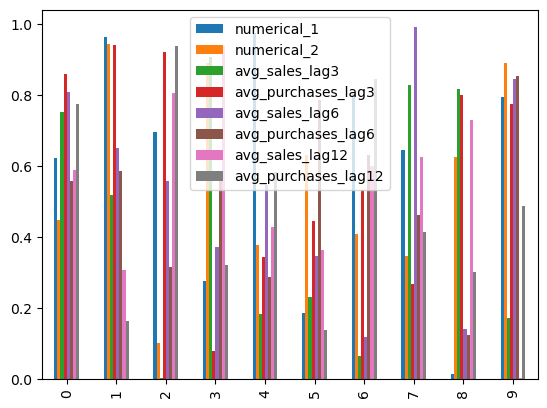

In [103]:
dfnum = pd.DataFrame(np.random.rand(10, 8), columns=["numerical_1", "numerical_2", "avg_sales_lag3", "avg_purchases_lag3", "avg_sales_lag6", "avg_purchases_lag6", "avg_sales_lag12", "avg_purchases_lag12"])
dfnum.plot.bar();
     

<Figure size 640x480 with 0 Axes>

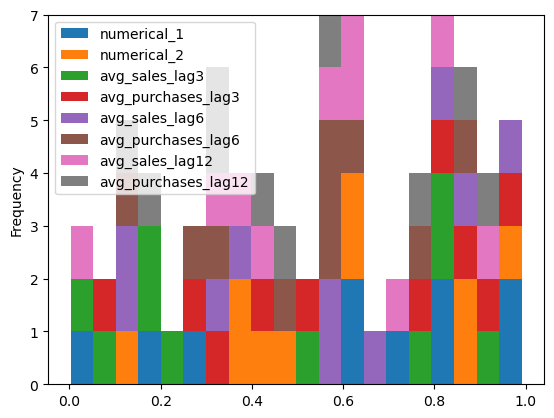

In [104]:

plt.figure();

dfnum.plot.hist(stacked=True, bins=20);

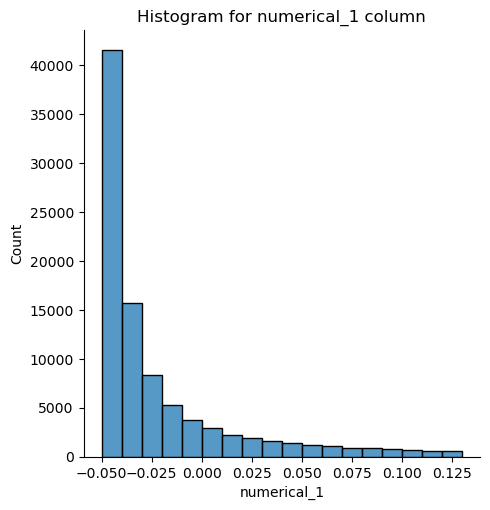

In [60]:
# Lets see the distribution of values in numerical 1 column
bins_list = []
k=-0.05
while k<0.13:
  bins_list.append(k)
  k+=0.01
sns.displot(merchants_df['numerical_1'],bins=bins_list)
plt.title('Histogram for numerical_1 column')
plt.show()
     

As it can be seen in the above figure that most of the values are negative and some are postive 

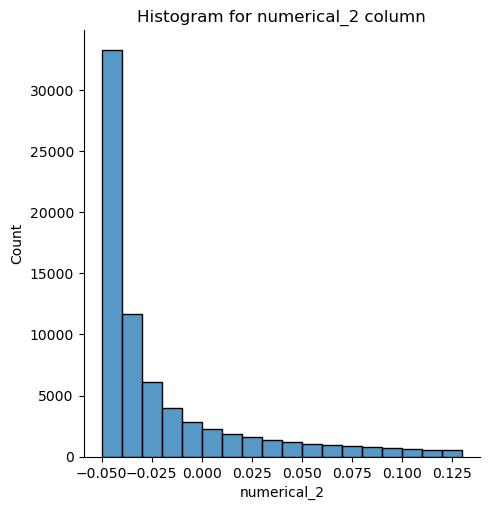

In [61]:
# Lets see the distribution of values in numerical 2 column
bins_list = []
k=-0.05
while k<0.13:
  bins_list.append(k)
  k+=0.01
sns.displot(merchants_df['numerical_2'],bins=bins_list)
plt.title('Histogram for numerical_2 column')
plt.show()

same as the above one

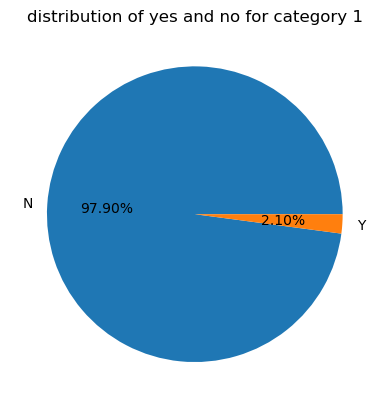

In [62]:
# Lets see rhe distribution of yes and no for category 1
data = merchants_df['category_1'].value_counts().values
labels = merchants_df['category_1'].value_counts().index
plt.pie(data, labels = labels, autopct='%.2f%%')
plt.title('distribution of yes and no for category 1')
plt.show()

it can be seen that it is highly imbalanced yes only consist of 2.1% of whole data

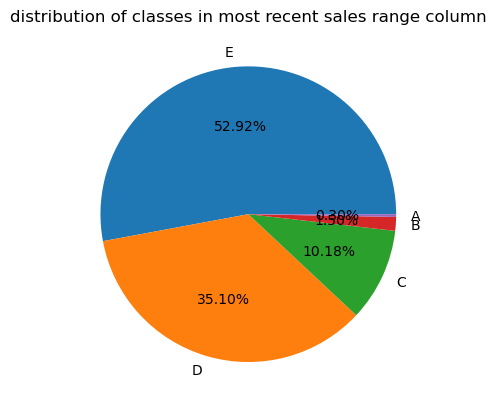

In [63]:
# Lets see the distribution of the classes in most recent sales range
data = merchants_df['most_recent_sales_range'].value_counts().values
labels = merchants_df['most_recent_sales_range'].value_counts().index
plt.pie(data, labels = labels, autopct='%.2f%%')
plt.title('distribution of classes in most recent sales range column')
plt.show()

As it can that class a and b are very less in number c,d,e are in the balanced range. i.e 97.90%

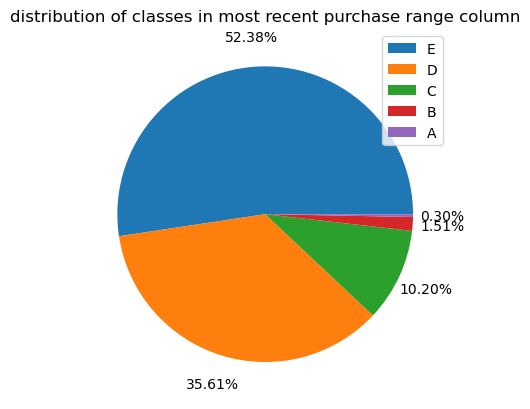

In [65]:
# Lets see the distribution of the classes in most recent purchase range
data = merchants_df['most_recent_purchases_range'].value_counts().values
labels = merchants_df['most_recent_purchases_range'].value_counts().index
plt.pie(data, autopct='%.2f%%',pctdistance=1.2,labeldistance=5)
plt.legend(labels=labels)
plt.title('distribution of classes in most recent purchase range column')
plt.show()

The same pattern in observed in purchases as sales range

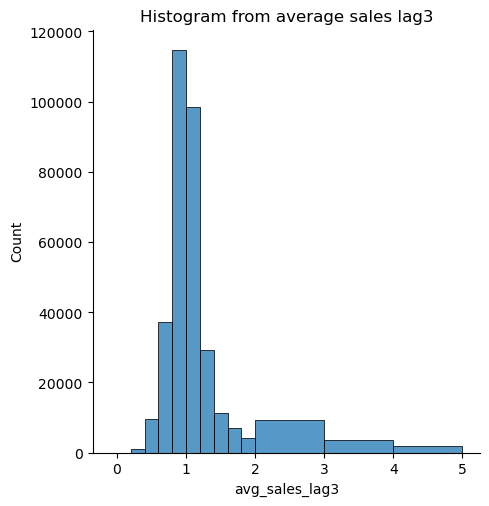

In [66]:
# Lets find out the distribution of the avg_sales_lag3 data points
sns.displot(merchants_df['avg_sales_lag3'],bins=[-0.1,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,3,4,5])
plt.title('Histogram from average sales lag3')
plt.show()

As it can be seen in the above graph that majority of points lies between 0 and 2 for average sales lag for quarter 3

In [67]:
# Lets check if there are any nan values and find out minimum and maximum values
print('There are {} nan values in average_lag_3'.format(np.sum(np.isnan(merchants_df['avg_sales_lag3']))))
print('The minimum value for average_sales_lag_3 is {}'.format(merchants_df['avg_sales_lag3'].min()))
print('The maximum value for average_sales_lag_3 is {}'.format(merchants_df['avg_sales_lag3'].max()))

There are 13 nan values in average_lag_3
The minimum value for average_sales_lag_3 is -82.12999725341797
The maximum value for average_sales_lag_3 is 851844.625


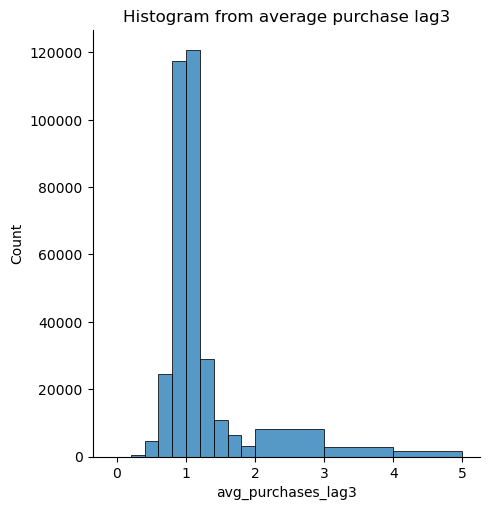

In [68]:

# Lets find out the distribution of the avg_purchase_lag3 data points
sns.displot(merchants_df['avg_purchases_lag3'],bins=[-0.1,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,3,4,5])
plt.title('Histogram from average purchase lag3')
plt.show()
     

As it can be seen in the above graph that majority of points lies between 0 and 2 for average purchase lag for quarter 3

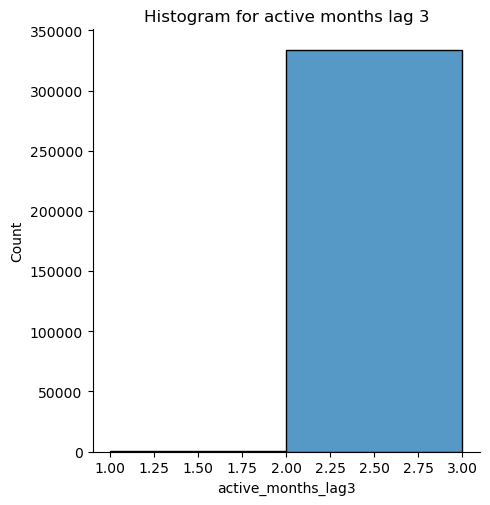

In [71]:
sns.displot(merchants_df['active_months_lag3'],bins=[1,2,3])
plt.title('Histogram for active months lag 3')
plt.show()

In [72]:

# Lets check if there are any nan values and find out minimum and maximum values
print('There are {} nan values in average_lag_3'.format(np.sum(np.isnan(merchants_df['avg_purchases_lag3']))))
print('The minimum value for average_purchase_lag_3 is {}'.format(merchants_df['avg_purchases_lag3'].min()))
print('The maximum value for average_purchase_lag_3 is {}'.format(merchants_df['avg_purchases_lag3'].max()))

There are 0 nan values in average_lag_3
The minimum value for average_purchase_lag_3 is 0.33349533
The maximum value for average_purchase_lag_3 is inf


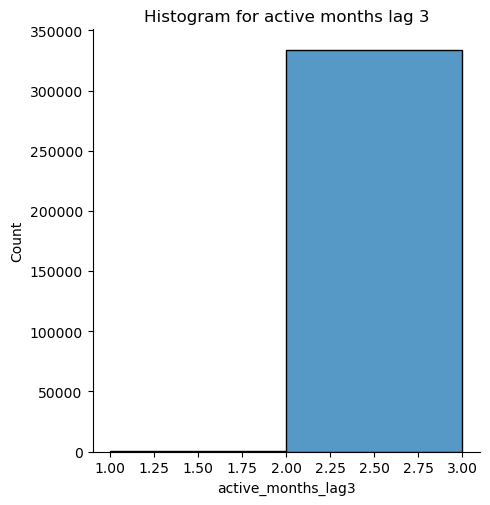

In [73]:
sns.displot(merchants_df['active_months_lag3'],bins=[1,2,3])
plt.title('Histogram for active months lag 3')
plt.show()

In [74]:
# Lets find out the percentage of points for class 3
temp = merchants_df['active_months_lag3'].value_counts()
percentage = temp[3]/(temp[1]+temp[2]+temp[3])*100
print('There are {:.2f}% of points for class 3'.format(percentage))

There are 99.57% of points for class 3


In [75]:
# Lets check if there are any nan values and find out minimum and maximum values
print('There are {} nan values in average_lag_3'.format(np.sum(np.isnan(merchants_df['active_months_lag3']))))
print('The minimum value for average_purchase_lag_3 is {}'.format(merchants_df['active_months_lag3'].min()))
print('The maximum value for average_purchase_lag_3 is {}'.format(merchants_df['active_months_lag3'].max()))

There are 0 nan values in average_lag_3
The minimum value for average_purchase_lag_3 is 1
The maximum value for average_purchase_lag_3 is 3


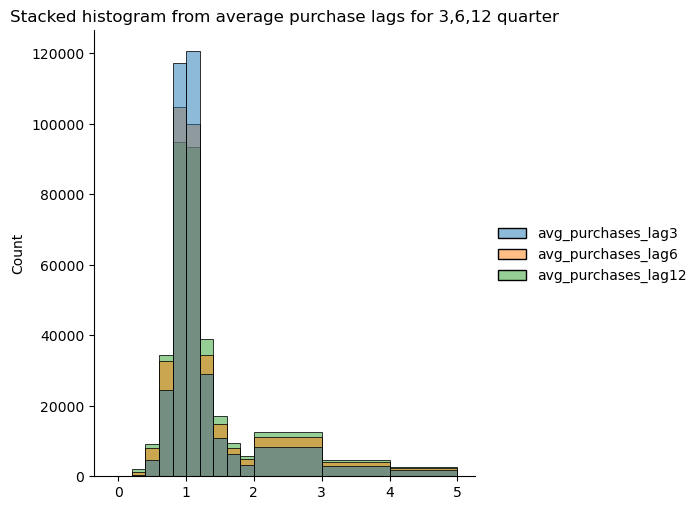

In [76]:

# Let's see the avg purchase lags for all the three quarters
sns.displot(merchants_df[['avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12']],bins=[-0.1,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,3,4,5])
plt.title('Stacked histogram from average purchase lags for 3,6,12 quarter')
plt.show()

The purchase record for all the three quarter is almost in the same range only

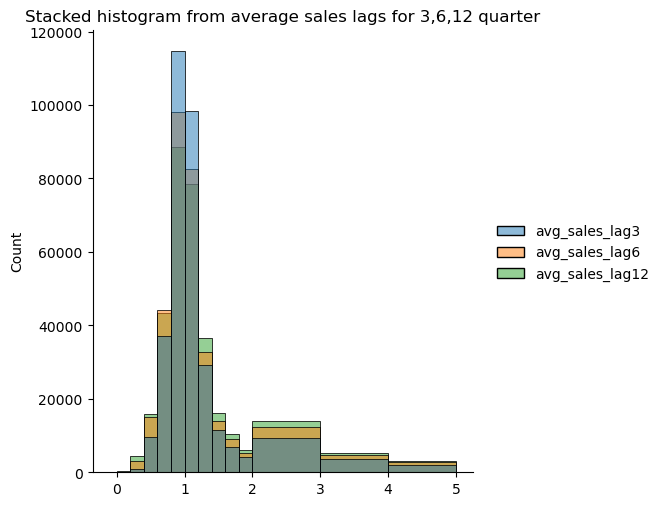

In [77]:

# Let's see the avg sales lags for all the three quarters
sns.displot(merchants_df[['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']],bins=[-0.1,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,3,4,5],legend=True)
plt.title('Stacked histogram from average sales lags for 3,6,12 quarter')
plt.show()

The sales record for all the three quarter is almost in the same range only

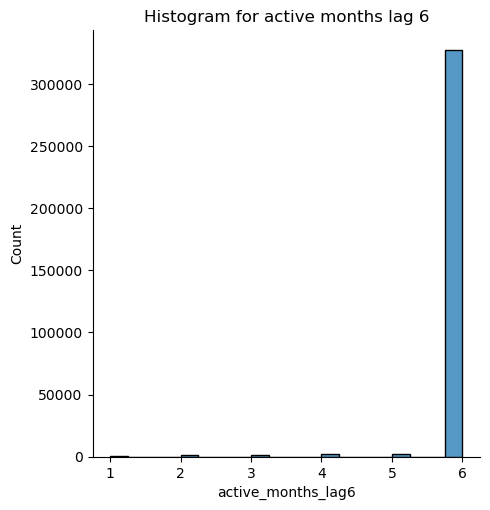

In [78]:

# Lets see for the active months lag_6
sns.displot(merchants_df['active_months_lag6'])
plt.title('Histogram for active months lag 6')
plt.show()

data for point 6 is almost max than all others

In [93]:

# Lets find out the percentage of points for class 6
temp = merchants_df['active_months_lag6'].value_counts()
percentage = temp[6]/(temp[1]+temp[2]+temp[3]+temp[4]+temp[5]+temp[6])*100
print('There are {:.2f}% of points for class 6 in active month lag_6'.format(percentage))

There are 97.79% of points for class 6 in active month lag_6


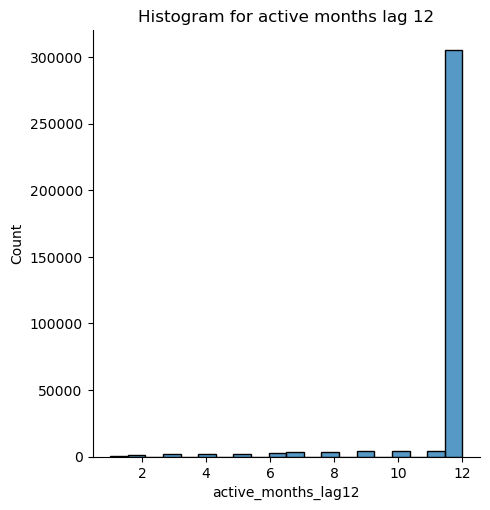

In [94]:

# Lets see for the active months lag_12
sns.displot(merchants_df['active_months_lag12'])
plt.title('Histogram for active months lag 12')
plt.show()

In [95]:

# Lets find out the percentage of points for class 12
temp = merchants_df['active_months_lag12'].value_counts()
percentage = temp[12]/(np.sum(temp.values))*100
print('There are {:.2f}% of points for class 12 in active month lag_12'.format(percentage))
     

There are 91.16% of points for class 12 in active month lag_12


In [96]:

# Lets check if there are any nan values and find out minimum and maximum values for avg_sales_lag6
print('There are {} nan values in average_lag_6'.format(np.sum(np.isnan(merchants_df['avg_purchases_lag6']))))
print('The minimum value for average_purchase_lag_6 is {}'.format(merchants_df['avg_purchases_lag6'].min()))
print('The maximum value for average_purchase_lag_6 is {}'.format(merchants_df['avg_purchases_lag6'].max()))
# Lets check if there are any nan values and find out minimum and maximum values for avg_sales_lag12
print('There are {} nan values in average_lag_12'.format(np.sum(np.isnan(merchants_df['avg_purchases_lag12']))))
print('The minimum value for average_purchase_lag_12 is {}'.format(merchants_df['avg_purchases_lag12'].min()))
print('The maximum value for average_purchase_lag_12 is {}'.format(merchants_df['avg_purchases_lag12'].max()))

There are 0 nan values in average_lag_6
The minimum value for average_purchase_lag_6 is 0.16704466
The maximum value for average_purchase_lag_6 is inf
There are 0 nan values in average_lag_12
The minimum value for average_purchase_lag_12 is 0.09832954
The maximum value for average_purchase_lag_12 is inf


In [97]:
# Lets check if there are any nan values and find out minimum and maximum values active_months_lag6
print('There are {} nan values in average_lag_6'.format(np.sum(np.isnan(merchants_df['active_months_lag6']))))
print('The minimum value for average_purchase_lag_6 is {}'.format(merchants_df['active_months_lag6'].min()))
print('The maximum value for average_purchase_lag_6 is {}'.format(merchants_df['active_months_lag6'].max()))
# Lets check if there are any nan values and find out minimum and maximum values active_months_lag12
print('There are {} nan values in average_lag_12'.format(np.sum(np.isnan(merchants_df['active_months_lag12']))))
print('The minimum value for average_purchase_lag_12 is {}'.format(merchants_df['active_months_lag12'].min()))
print('The maximum value for average_purchase_lag_12 is {}'.format(merchants_df['active_months_lag12'].max()))

There are 0 nan values in average_lag_6
The minimum value for average_purchase_lag_6 is 1
The maximum value for average_purchase_lag_6 is 6
There are 0 nan values in average_lag_12
The minimum value for average_purchase_lag_12 is 1
The maximum value for average_purchase_lag_12 is 12


In [100]:
#merchants.csv have outliers that squeeze most of the data into one bin
merchants_outlier = merchants_df.loc[(merchants_df['numerical_1'] < 0.1) &
                               (merchants_df['numerical_2'] < 0.1) &
                               (merchants_df['avg_sales_lag3'] < 5) &
                               (merchants_df['avg_purchases_lag3'] < 5) &
                               (merchants_df['avg_sales_lag6'] < 10) &
                               (merchants_df['avg_purchases_lag6'] < 10) &
                               (merchants_df['avg_sales_lag12'] < 10) &
                               (merchants_df['avg_purchases_lag12'] < 10)]
     

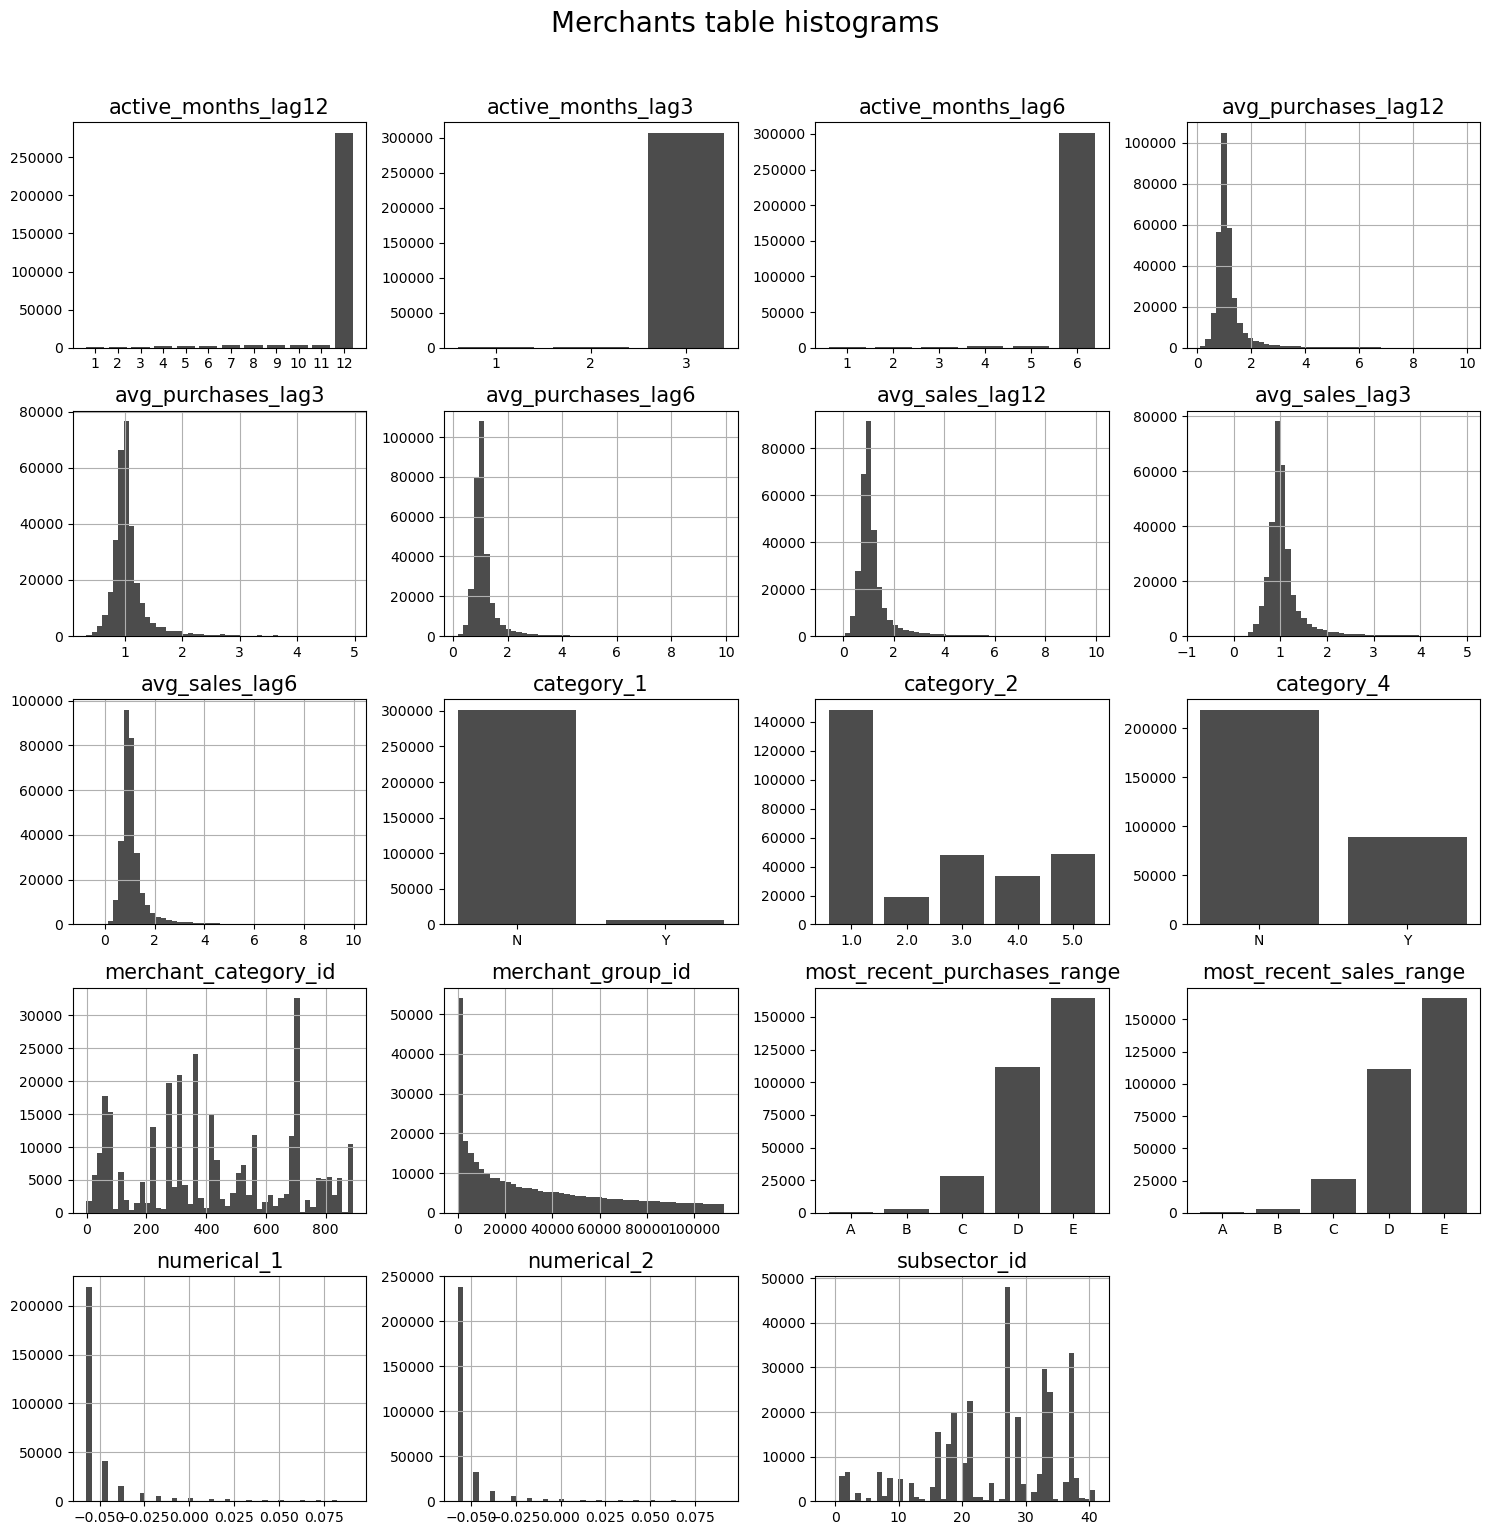

In [101]:
cat_cols = ['active_months_lag6','active_months_lag3','most_recent_sales_range', 'most_recent_purchases_range','category_1','active_months_lag12','category_4', 'category_2']
num_cols = ['numerical_1', 'numerical_2','merchant_group_id','merchant_category_id','avg_sales_lag3', 'avg_purchases_lag3', 'subsector_id', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12']

plt.figure(figsize=[15, 15])
plt.suptitle('Merchants table histograms', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols) + len(num_cols))/4))
last_ind = 0
for col in sorted(list(merchants_outlier.columns)):
    #print('processing column ' + col)
    if col in cat_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        vc = merchants_outlier[col].value_counts()
        x = np.array(vc.index)
        y = vc.values
        inds = np.argsort(x)
        x = x[inds].astype(str)
        y = y[inds]
        plt.bar(x, y, color=(0, 0, 0, 0.7))
        plt.title(col, fontsize=15)
    if col in num_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        merchants_outlier[col].hist(bins = 50, color=(0, 0, 0, 0.7))
        plt.title(col, fontsize=15)
    plt.tight_layout()

Observations:

Looks like merchant_group_ids, numerical_1 and numerical_2 are sorted in the descending order and Most recent purchase range and sales range are sorted in ascendig

# 4.  Train and Test Data

In [80]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int8   
 3   feature_2           201917 non-null  int8   
 4   feature_3           201917 non-null  int8   
 5   target              201917 non-null  float16
dtypes: float16(1), int8(3), object(2)
memory usage: 4.0+ MB


In [82]:
train_df['first_active_month'] = pd.to_datetime(train_df['first_active_month'], errors='coerce')
train_df['card_id'] = train_df['card_id'].astype('string')

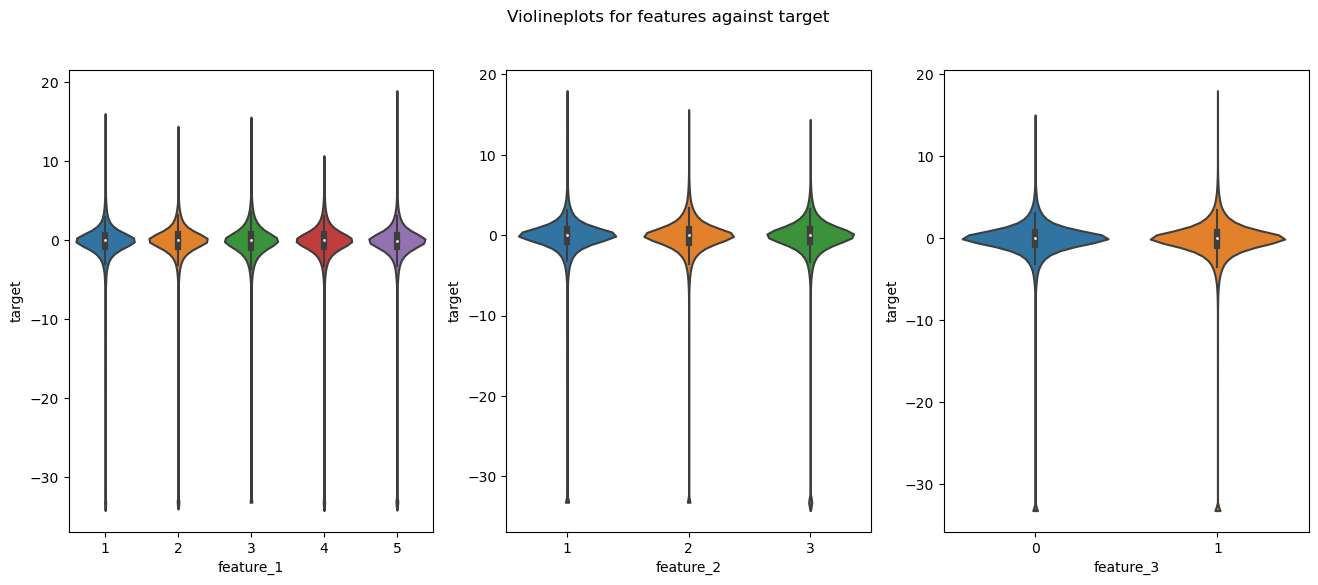

In [83]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Violineplots for features against target');
sns.violinplot(x="feature_1", y="target", data=train_df, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="target", data=train_df, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="target", data=train_df, ax=ax[2], title='feature_3');

As you can see in the above that for all three features the target is not being distinguished by them even the class for each features are even overlapping.so from this it can be understood that more features are needed

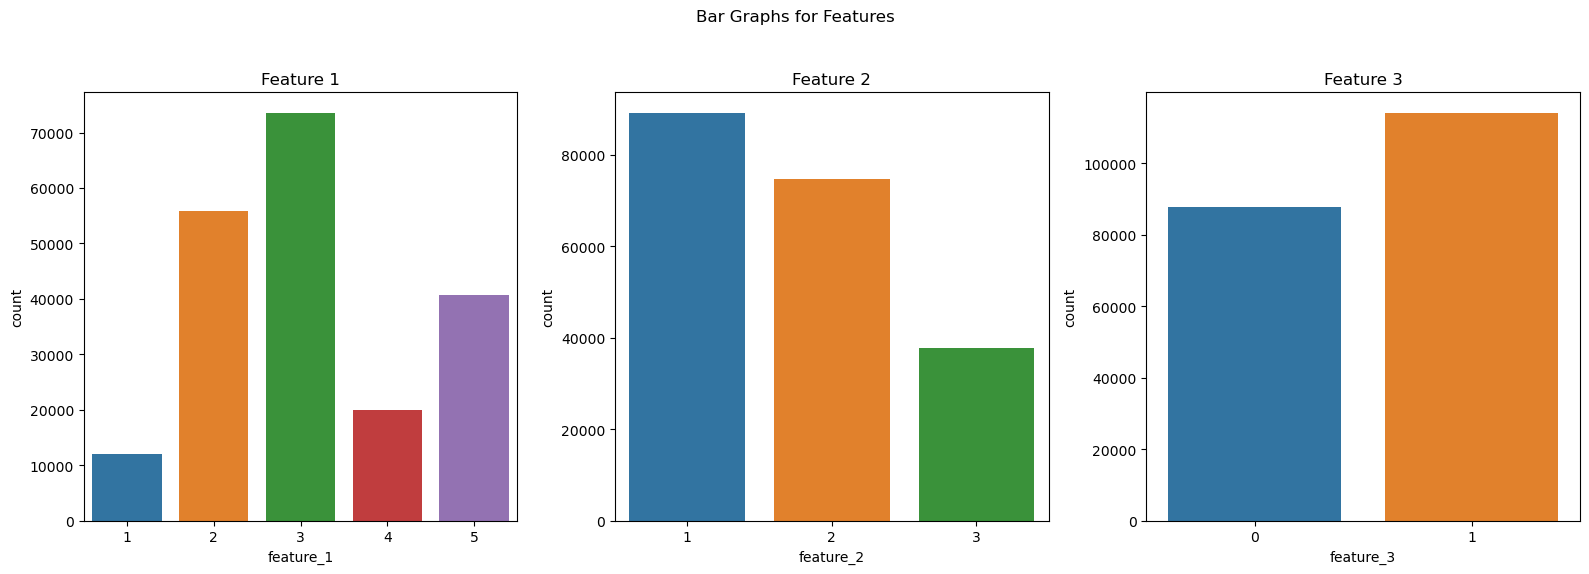

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
plt.suptitle('Bar Graphs for Features')

sns.countplot(x="feature_1", data=train_df, ax=ax[0])
ax[0].set_title('Feature 1')

sns.countplot(x="feature_2", data=train_df, ax=ax[1])
ax[1].set_title('Feature 2')

sns.countplot(x="feature_3", data=train_df, ax=ax[2])
ax[2].set_title('Feature 3')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The features are insufficient to determine the target.

Outlier vs. non-outlier feature distributions

<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Nancy\AppData\Local\Temp\ipykernel_13732\1854579027.py:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if col is not 'target':


2207 outliers found (target < -30)


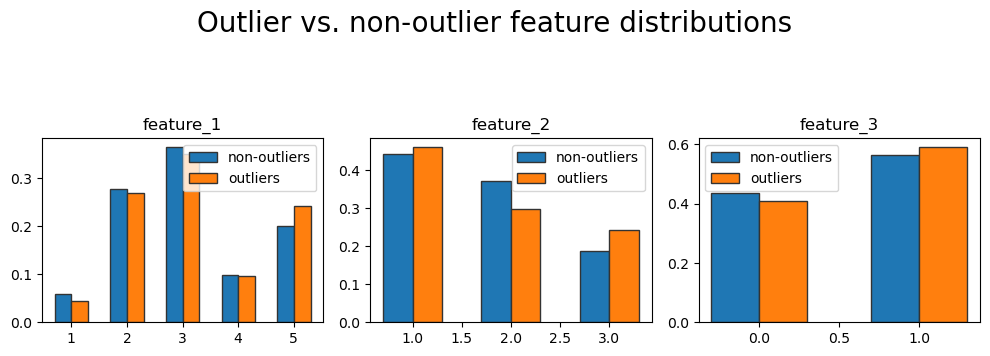

In [113]:

# Separating outliers and non_outliers features in Target and plotting
outliers = train_df.loc[train_df['target'] < -30]
non_outliers = train_df.loc[train_df['target'] >= -30]
print('{:d} outliers found (target < -30)'.format(outliers.shape[0]))

#Outlier vs. non-outlier feature distributions
plt.figure(figsize=[10,5])
plt.suptitle('Outlier vs. non-outlier feature distributions', fontsize=20, y=1.1)

for num, col in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
    if col is not 'target':
        plt.subplot(2, 3, num+1)
        v_c = non_outliers[col].value_counts() / non_outliers.shape[0]
        plt.bar(v_c.index, v_c, label=('non-outliers'), align='edge', width=-0.3, edgecolor=[0.2]*3)
        v_c = outliers[col].value_counts() / outliers.shape[0]
        plt.bar(v_c.index, v_c, label=('outliers'), align='edge', width=0.3, edgecolor=[0.2]*3)
        plt.title(col)
        plt.legend()

plt.tight_layout()
plt.show()

Observation

We can see There are some very little differences between outliers and non-outliers

In [115]:
train_df.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006241
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006241,-0.008125,1.000000


In [120]:
test_df.corr()

,feature_1,feature_2,feature_3
feature_1,1.000000,-0.132055,0.582793
feature_2,-0.132055,1.000000,0.065346
feature_3,0.582793,0.065346,1.000000


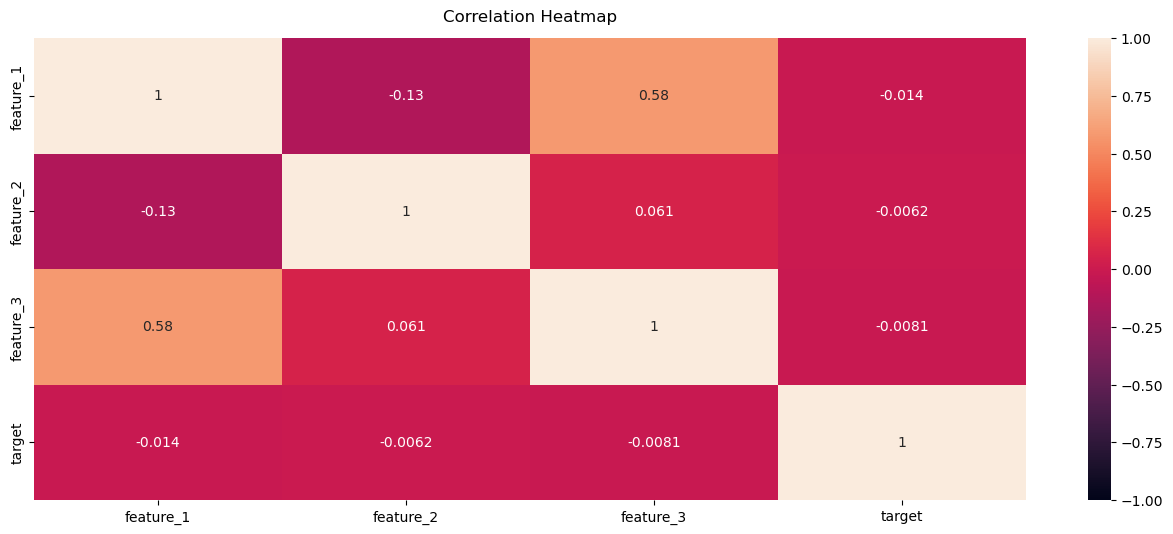

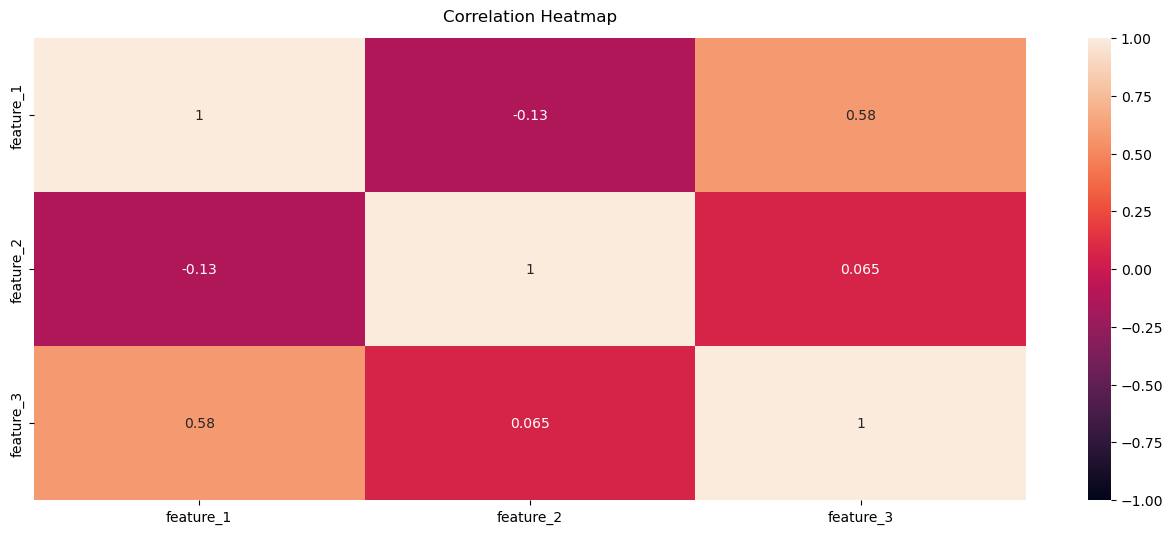

In [121]:

def heat_map(df):
  plt.figure(figsize=(16, 6))
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
heat_map(train_df)
heat_map(test_df)


Observation:-

Train_df:
1. The correlation between feature_1 and feature_3 is moderately positive (around 0.58), suggesting that these two features may have some linear relationship.
2. Other feature pairs (feature_1 & feature_2, feature_2 & feature_3) show weak correlation, indicating little to no linear relationship between them.
2. The target variable shows very weak or near-zero correlation with all three features (feature_1, feature_2, feature_3), suggesting that none of these features alone have a strong linear relationship with the target variable.

Test_df:
1. the correlation between feature_1 and feature_3 remains moderately positive (around 0.58), indicating consistency across training and testing sets for this relationship
2. feature_1 & feature_2 and feature_2 & feature_3 show weak correlations in the testing set as well, mirroring the training set’s pattern.

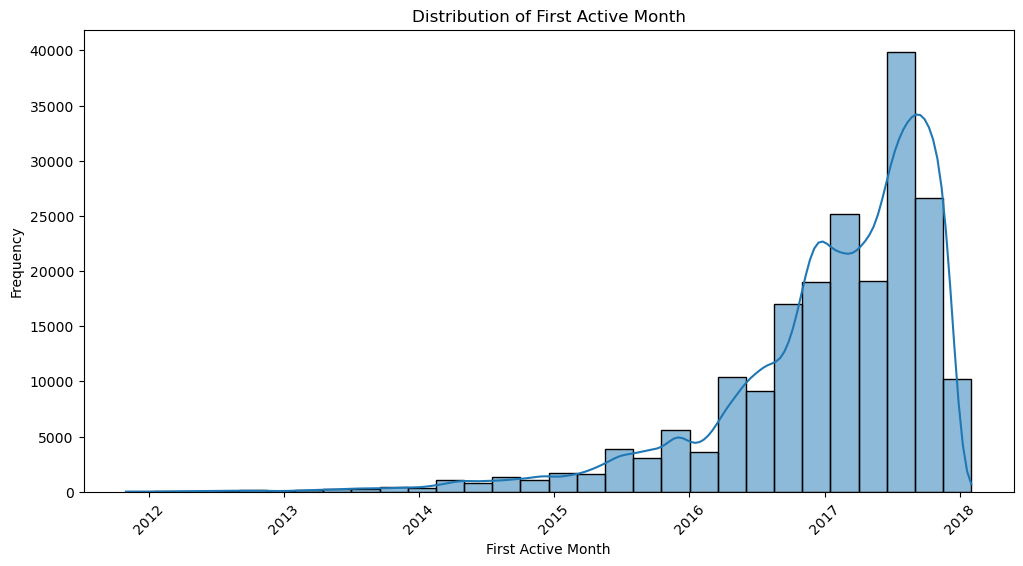

In [85]:
# Plot the distribution of 'first_active_month'
plt.figure(figsize=(12, 6))
sns.histplot(train_df['first_active_month'].dropna(), bins=30, kde=True)
plt.title('Distribution of First Active Month')
plt.xlabel('First Active Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

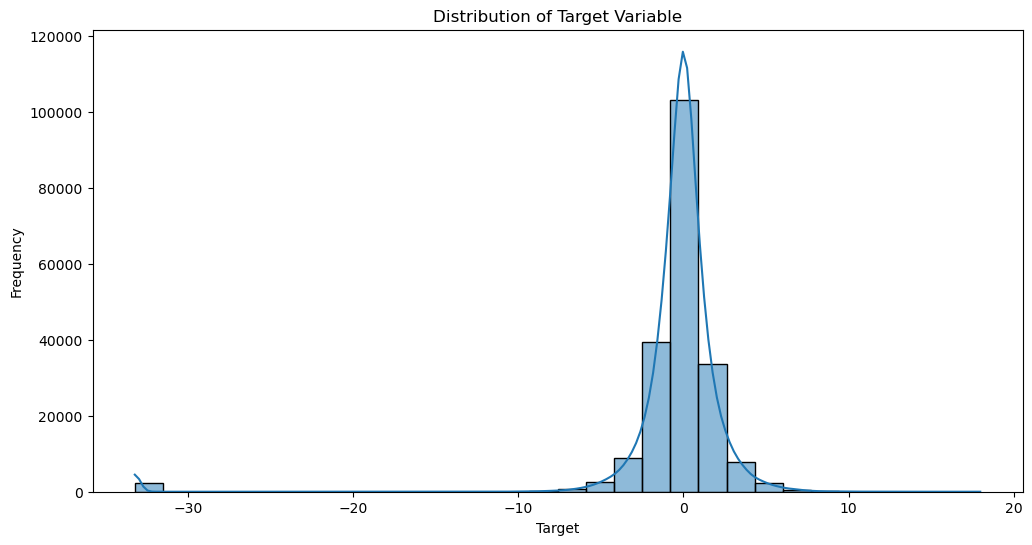

In [86]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

The distribution of target seem symetrical around 0. Thee ones < -30 looks to be outliers? Lets see how ltr.

In [87]:
print('There are {0} samples with target lower than -30.'.format(train_df.loc[train_df.target < -20].shape[0]))

There are 2207 samples with target lower than -30.


In [88]:
test_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123623 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int8  
 3   feature_2           123623 non-null  int8  
 4   feature_3           123623 non-null  int8  
dtypes: int8(3), object(2)
memory usage: 2.2+ MB


In [90]:
test_df['first_active_month'] = pd.to_datetime(test_df['first_active_month'], errors='coerce')
test_df['card_id'] = test_df['card_id'].astype('string')

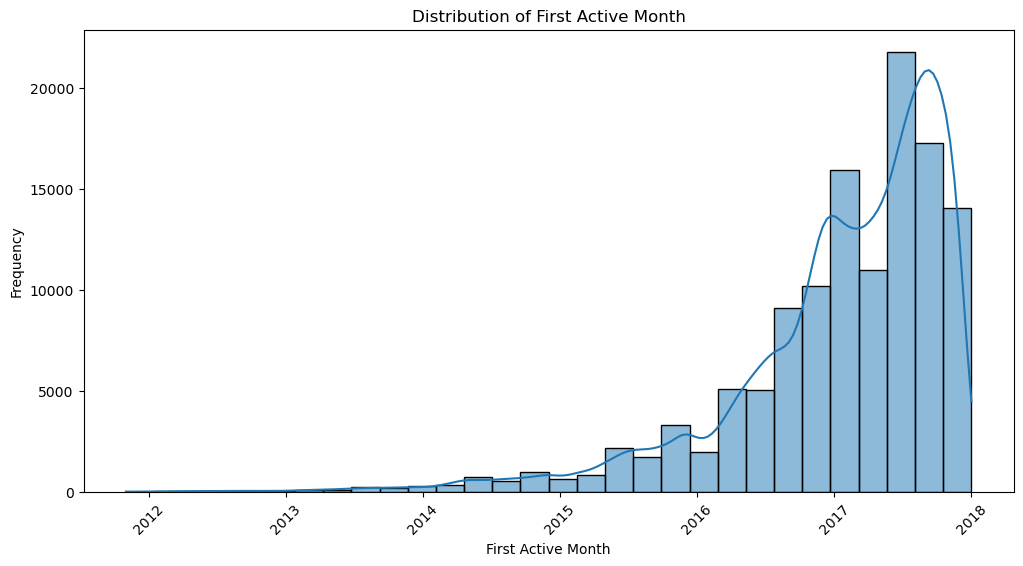

In [91]:
# Plot the distribution of 'first_active_month'
plt.figure(figsize=(12, 6))
sns.histplot(test_df['first_active_month'].dropna(), bins=30, kde=True)
plt.title('Distribution of First Active Month')
plt.xlabel('First Active Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The distribution looks very similar to that of test's.

In [92]:
train_df['target'][(train_df['target']<-10) | (train_df['target']>10)].value_counts().values.sum()

2311

so as you can see that there are 2311 extreme data points(outliers) for target variable

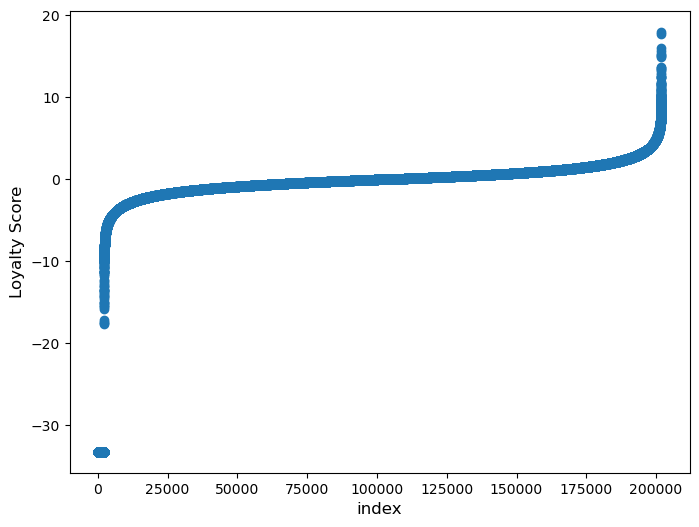

In [105]:
target_col = "target"

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

C:\Users\Nancy\ananconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


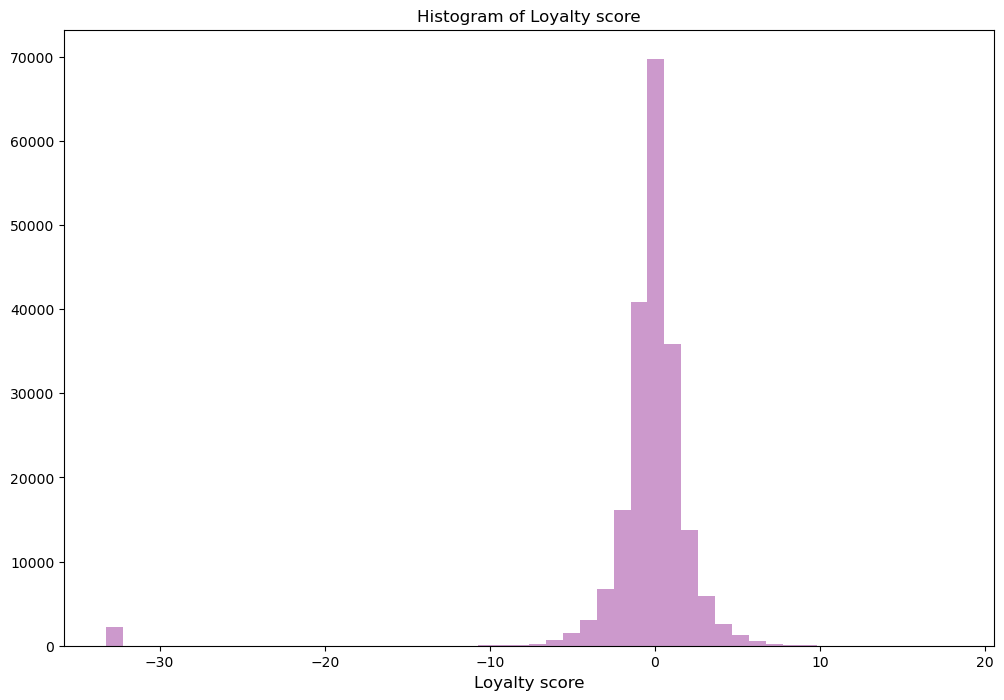

In [106]:
plt.figure(figsize=(12,8))
sns.distplot(train_df[target_col].values, bins=50, kde=False, color="purple")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

We can see that some of the loyalty values are far apart (less than -30) compared to others

In [107]:
(train_df[target_col]<-30).sum()

2207

We have about 2207 rows , which has values different from the rest

In [108]:
(train_df[target_col]>10).sum()

48

Only 48 rows have target_col values greater than 10, meaning very high loyalty scores are relatively rare.

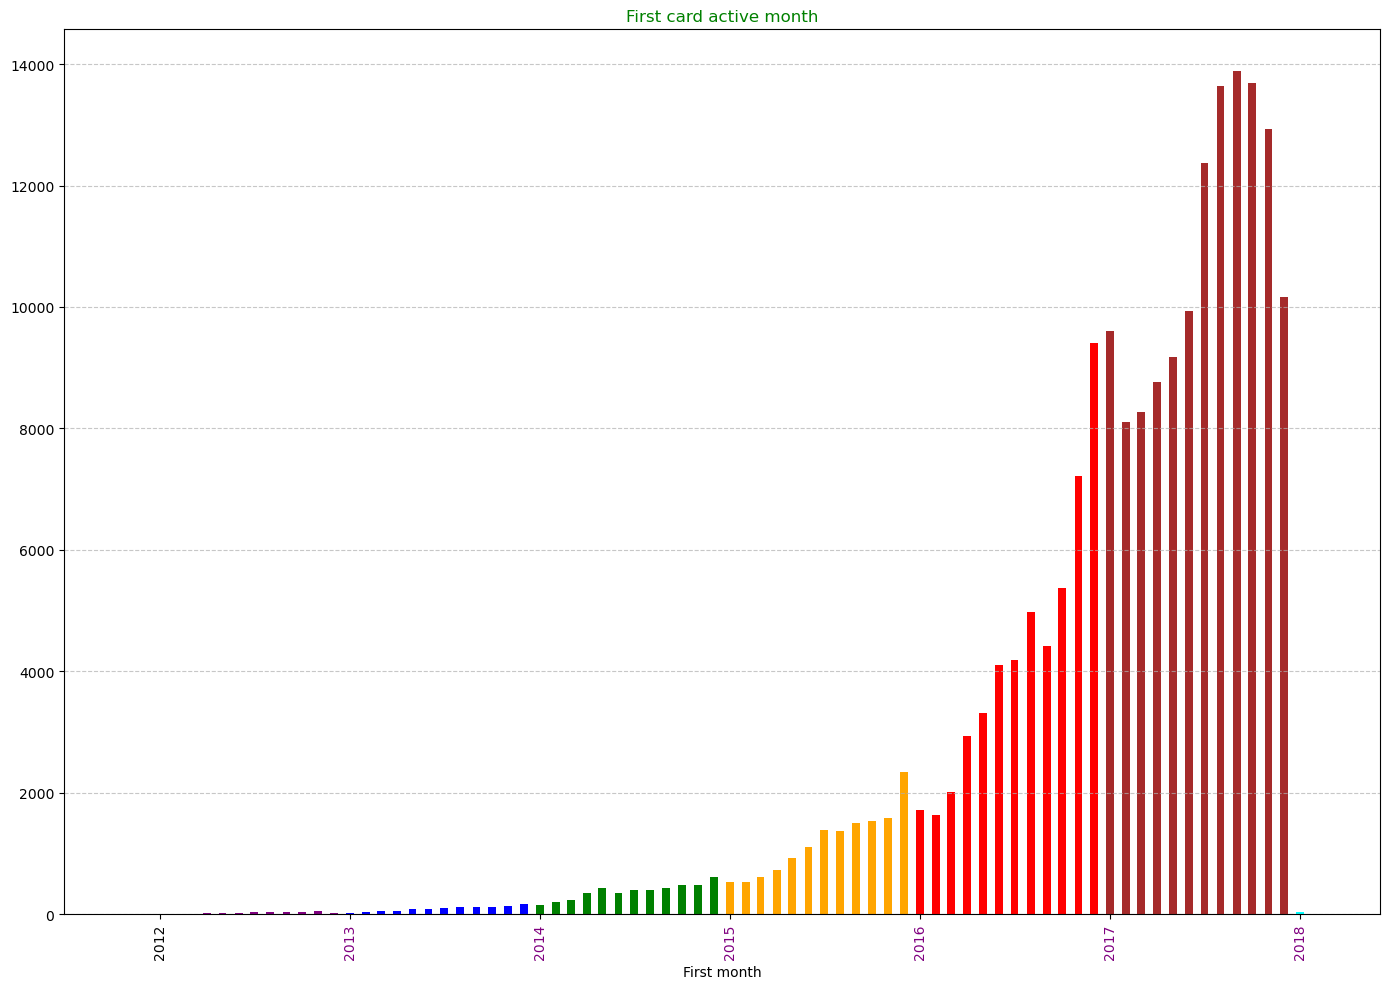

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

train_df["first_active_month"] = pd.to_datetime(train_df["first_active_month"])


first_mount = train_df["first_active_month"].value_counts()
srt = first_mount.sort_index()


years = srt.index.year.unique()


MY_BASE_COLORS = {'2012': 'purple', '2013': 'blue', '2014': 'green', '2015': 'orange', '2016': 'red', '2017': 'brown', '2018': 'cyan'}
year_cmap = {year: MY_BASE_COLORS.get(str(year), 'black') for year in years}


cmap_seq = srt.index.map(lambda x: year_cmap.get(x.year, 'black'))

# Plotting
fig = plt.figure(figsize=(14, 10))
plt.bar(
    srt.index,
    srt.values,
    color=cmap_seq,
    width=15  
)
plt.xticks(rotation='vertical', fontsize=10)
plt.xlabel('First month')
plt.title('First card active month', color='g')
plt.grid(axis='y', linestyle='--', alpha=0.7)  


ax = plt.gca()
ax.set_facecolor('white')
for i, t in enumerate(ax.get_xticklabels()):
    t.set_color(cmap_seq[i])

plt.tight_layout()  
plt.show()


Observation:

Can see 2017 has more transaction